In [6]:

import pandas as pd  # O "Excel" do Python
import numpy as np   # Matemática avançada
import matplotlib.pyplot as plt # Para criar gráficos
import seaborn as sns # Para deixar os gráficos bonitos
from sklearn.model_selection import train_test_split # Para dividir os dados
from sklearn.ensemble import RandomForestClassifier # O Cérebro (IA)
from sklearn.metrics import classification_report, confusion_matrix # Para medir a nota da IA
# Instala a biblioteca de balanceamento
!pip install imbalanced-learn

# Configuração para os gráficos aparecerem no notebook
%matplotlib inline

In [7]:
try:
    
    df = pd.read_csv('data/telecom_churn.csv', sep=',')
    
    print("✅ Dados carregados com sucesso!")
    # Aqui corrigi de 'dados' para 'df' para ficar igual ao resto
    print(f"Temos {df.shape[0]} linhas e {df.shape[1]} colunas.")
    
    display(df.head()) 

except FileNotFoundError:
    print("❌ Erro: Arquivo não encontrado. Verifique se a pasta 'data' existe e o arquivo está lá.")

✅ Dados carregados com sucesso!
Temos 1000 linhas e 5 colunas.


,id_cliente,idade,fatura_mensal,tempo_contrato,churn
0,1,56,70.19,51,0
1,2,69,117.34,63,0
2,3,46,146.99,52,1
3,4,32,59.39,38,0
4,5,60,117.26,30,0


In [8]:
# CÉLULA 3: Processamento e Treinamento
# 1. Remover a coluna 'id_cliente' (ela é só um número, não ajuda a prever comportamento)
df_clean = df.drop(columns=['id_cliente'])

# 2. Separar as perguntas (X) das respostas (y)
X = df_clean.drop('churn', axis=1) # Tudo, menos a coluna churn
y = df_clean['churn']              # Apenas a coluna churn

# 3. Dividir os dados: 70% para estudar (Treino), 30% para a prova final (Teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Criar e Treinar a Inteligência Artificial (Random Forest)
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

print("✅ Modelo treinado com sucesso!")
print(f"O modelo estudou {X_train.shape[0]} clientes e vai ser testado em {X_test.shape[0]} clientes.")

✅ Modelo treinado com sucesso!
O modelo estudou 700 clientes e vai ser testado em 300 clientes.


--- Relatório de Performance ---
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       287
           1       0.80      0.31      0.44        13

    accuracy                           0.97       300
   macro avg       0.88      0.65      0.71       300
weighted avg       0.96      0.97      0.96       300


📷 Gráfico salvo com sucesso em 'images/confusion_matrix.png'!


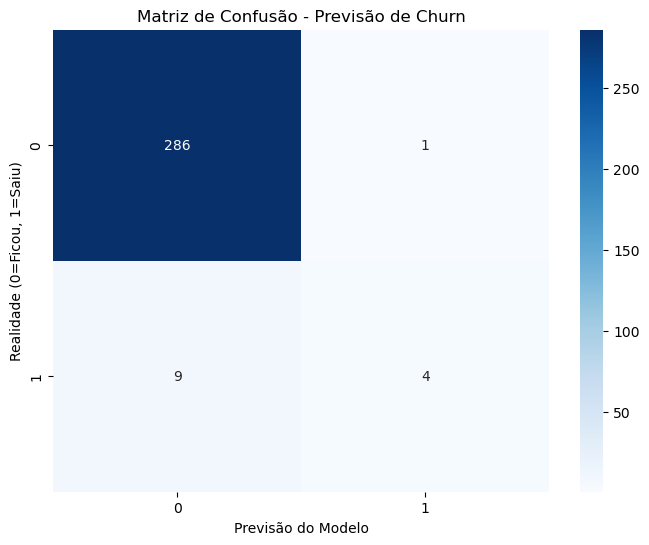

In [10]:
# CÉLULA 4: Avaliação e Geração de Gráficos
# 1. Fazer as previsões
y_pred = modelo.predict(X_test)

# 2. Mostrar o boletim (Métricas)
print("--- Relatório de Performance ---")
print(classification_report(y_test, y_pred))

# 3. Gerar a Matriz de Confusão (O gráfico que vai pro GitHub)
plt.figure(figsize=(8, 6))
matriz = confusion_matrix(y_test, y_pred)

# Criando o mapa de calor
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Previsão de Churn')
plt.ylabel('Realidade (0=Ficou, 1=Saiu)')
plt.xlabel('Previsão do Modelo')

# 4. Salvar a imagem na pasta 'images'
plt.savefig('images/confusion_matrix.png')
print("\n📷 Gráfico salvo com sucesso em 'images/confusion_matrix.png'!")
plt.show()

In [11]:
from imblearn.over_sampling import SMOTE

print(f"🔴 Antes do balanceamento: {y_train.value_counts().to_dict()}")

# Cria o balanceador
smote = SMOTE(random_state=42)

# Aplica APENAS no treino (Aprende com o X e cria novos y)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"🟢 Depois do balanceamento: {y_train_balanced.value_counts().to_dict()}")

🔴 Antes do balanceamento: {0: 672, 1: 28}
🟢 Depois do balanceamento: {0: 672, 1: 672}


--- Relatório da Versão 2 (Com SMOTE) ---
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       287
           1       0.30      0.46      0.36        13

    accuracy                           0.93       300
   macro avg       0.64      0.71      0.66       300
weighted avg       0.95      0.93      0.94       300



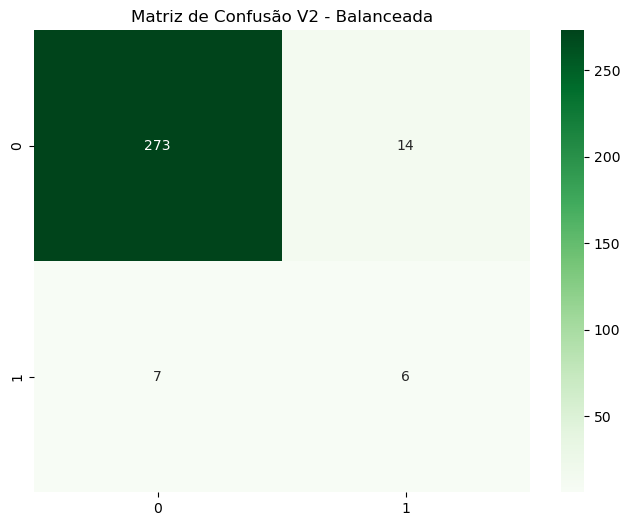

In [12]:
# Criando a Versão 2 do modelo
modelo_v2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Treina com os dados balanceados
modelo_v2.fit(X_train_balanced, y_train_balanced)

# Faz previsões na prova (X_test original, que não mexemos!)
y_pred_v2 = modelo_v2.predict(X_test)

# Avalia
print("--- Relatório da Versão 2 (Com SMOTE) ---")
print(classification_report(y_test, y_pred_v2))

# Matriz de Confusão V2
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_v2), annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão V2 - Balanceada')
plt.show()

In [13]:
plt.savefig('images/confusion_matrix_v2.png')

In [14]:
import joblib

# Salvando o modelo V2 (aquele balanceado com SMOTE) em um arquivo
joblib.dump(modelo_v2, 'modelo_churn.pkl')

print("✅ Modelo salvo como 'modelo_churn.pkl'!")

✅ Modelo salvo como 'modelo_churn.pkl'!
